## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Introduction

#### Business Overview:

* Mzalendo ltd is a housing stakeholder that gives advice to homeowners so that they can buy or sell homes.
The company want to help homeowners to be able to predict the current and future prices of their houses depending on different features.

#### Challenges:
* 



#### Proposed Solution:
* Our proposed solution to address the business problem and meet the project objectives is to use multiple linear regression modeling to analyze the King County House Sales dataset, which contains information on various factors that can influence the value of a home.

#### Conclusion:
* We aim to use multiple linear regression modeling,So that we can analyze the King County House Sales dataset to identify the most important factors that impact the value of a home, build an accurate regression model to predict home values, and provide guidance to homeowners on how to increase the estimated value of their homes through renovations.


## Business Problem
#### The business problem for this project is to provide guidance to homeowners on how home renovations might increase the estimated value of their homes, and by what amount. 

## Objectives

* To identify the most important factors that affect the value of a home in a northwestern county, and to determine the extent to which these factors impact home values.
* To build a multiple linear regression model that accurately predicts the value of a home based on these factors.
* To use the regression model to provide guidance to homeowners on how home renovations can increase the estimated value of their homes, and by what amount.
* To evaluate the performance of the regression model using appropriate metrics, and to compare the results of different models to determine the best approach.
* To communicate the findings and recommendations to the stakeholders in a clear and concise manner, and to ensure that they understand the implications of the results for their business.


## Analytical Questions
1. Which features have the strongest correlation with home sale price?
2. Are there any variables that need to be transformed or standardized before being used in the model?
3. How can we evaluate the performance of our model and ensure that it is not overfitting to the data?
4. How can we communicate the results of our analysis to stakeholders in a clear and actionable manner?

## Data Understanding

#### We will need to carefully examine each variable and determine its relevance to our business problem, as well as identify any missing or erroneous values that may need to be cleaned or imputed.We may also need to consider the relationships between different variables, and whether any transformations or interactions may be necessary to build an accurate regression model.Overall, our goal in data understanding is to gain a comprehensive understanding of the dataset and ensure its quality and suitable for analysis.

## Loading Libraries 

In [42]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Datasets 

In [88]:
#load the data
data_df = pd.read_csv("kc_house_data.csv")
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Statistical Analysis

In [89]:
def analyze_dataset(filename):
    """
    This function  outputs information about the shape,
    columns, and information of the dataset using the Pandas library.
    """
    # Output the shape of the dataset
    print("Shape of dataset:", df.shape)
    
    # Output the column names of the dataset
    print("Column names:", list(df.columns))
    
    # Output information about the dataset
    print(df.info())
    # output descriptive statistics about the dataset
    print(df.describe())

In [90]:
analyze_dataset("kc_house_data.csv")

Shape of dataset: (106, 1)
Column names: ['cc']
<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, ('id', 'id') to ('yr_renovated', 'sqft_living15')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cc      106 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB
None
               cc
count  106.000000
mean     0.223954
std      0.233066
min      0.000683
25%      0.036148
50%      0.146028
75%      0.333313
max      1.000000


# Data Pre_processing

## Duplicates

In [91]:
#checking for duplicates 
print("Number of duplicates: ",data_df.duplicated().sum())

Number of duplicates:  0


## Missing Values 
#define a function for duplicates, isnull & sum, outliers, 

In [93]:
# a more interpretable version
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    
    return missing


missing_data = missing_values(data_df)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
id,0,0.000000
sqft_above,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_built,0,0.000000


### fillna with the mode 
* why! the data is a real world and makes sense to be blank maybe we the one filling the house was 
    * house did not have view 
    * house has never been renovated 
    * house does not have a water front 
 * The mode of the datasets is the highest 

In [94]:
#get the sum and view the details 
data_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [95]:
#define a function to fillnas with mode 
columns =['waterfront', 'view', 'yr_renovated']
def fill_numeric_missing(dat, cols):
    for col in cols:
        dat[col].fillna(dat[col].mode()[0], inplace=True)
fill_numeric_missing(data_df, columns) 

### Data Types 

In [96]:
#Print dataframe head to have overview
data_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [97]:
#get the dtypes 
data_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

* for now the data seems to be fine we can proceed as it is unless otherwise 

### Outliers 

#### This is just a test please do not do not do this this is just to see the framework of my data 

<AxesSubplot:>

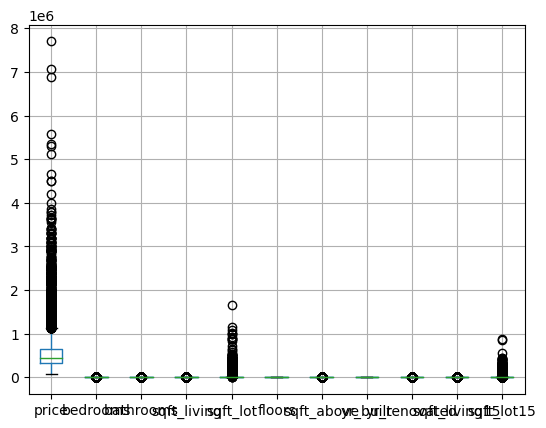

In [102]:
#get the outliers in a boxplot 
scores_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors' ,'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
data_df.boxplot(column=scores_columns)  

<AxesSubplot:>

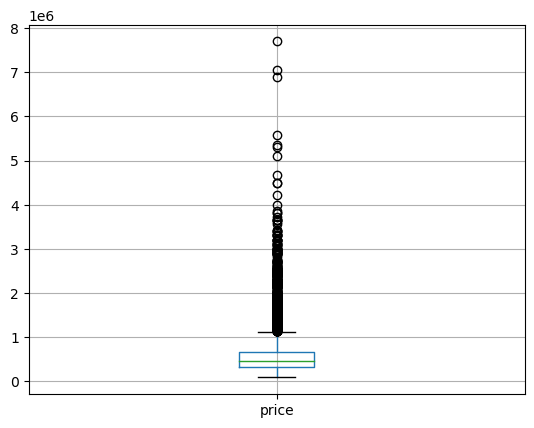

In [103]:
#### Price seems to be the most affected view on its own 
data.boxplot(column='price')  

In [104]:
# Getting outliers
def IQR_outliers(dat, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = dat[column].quantile(0.25)
    Q3 = dat[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((dat[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(dat[column][val])

    
    return outliers, Q1, Q3, IQR


price_outliers = IQR_outliers(data_df, "price")
price_outliers[0]

[1230000.0,
 2000000.0,
 1350000.0,
 1330000.0,
 1450000.0,
 2250000.0,
 1510000.0,
 2400000.0,
 2900000.0,
 1370000.0,
 2050000.0,
 3080000.0,
 2380000.0,
 1380000.0,
 1400000.0,
 1350000.0,
 1550000.0,
 1300000.0,
 1450000.0,
 1200000.0,
 1150000.0,
 1390000.0,
 1280000.0,
 1200000.0,
 1490000.0,
 2250000.0,
 1600000.0,
 2130000.0,
 1450000.0,
 1950000.0,
 1220000.0,
 3070000.0,
 1250000.0,
 1150000.0,
 1480000.0,
 1580000.0,
 1300000.0,
 1310000.0,
 2250000.0,
 1360000.0,
 1220000.0,
 2400000.0,
 1270000.0,
 1200000.0,
 1320000.0,
 2450000.0,
 1240000.0,
 1570000.0,
 1130000.0,
 1200000.0,
 1280000.0,
 1960000.0,
 1750000.0,
 5110000.0,
 1150000.0,
 1880000.0,
 1230000.0,
 2300000.0,
 2260000.0,
 5300000.0,
 1200000.0,
 2200000.0,
 1130000.0,
 1180000.0,
 1700000.0,
 1400000.0,
 2540000.0,
 1360000.0,
 1230000.0,
 5350000.0,
 1330000.0,
 1220000.0,
 1250000.0,
 1300000.0,
 1180000.0,
 1380000.0,
 1150000.0,
 1200000.0,
 2250000.0,
 1230000.0,
 1270000.0,
 1680000.0,
 1930000.0,
 118

In [70]:
#sort values to see the highest head and tail values 
data['price'].sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64

#### Outliers conclusion 
* smallest cost $78000- highest cost $ 7700000
* Does it make sense *YES*, why its real data 
* Next 
  * Scale the column so that we have reasonable data 

# Build a Baseline Simple Linear Regression Model


Our target variable is price, so lets find the correlations and coeffifients that are highests

In [74]:
#correlations
data.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.117855
floors           0.256804
lat              0.306692
bedrooms         0.308787
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

****  we see very high values that are too big for pvalue  0.005
####  Investigate this to find out if there is multicollination *

### Multicollinearity Analysis

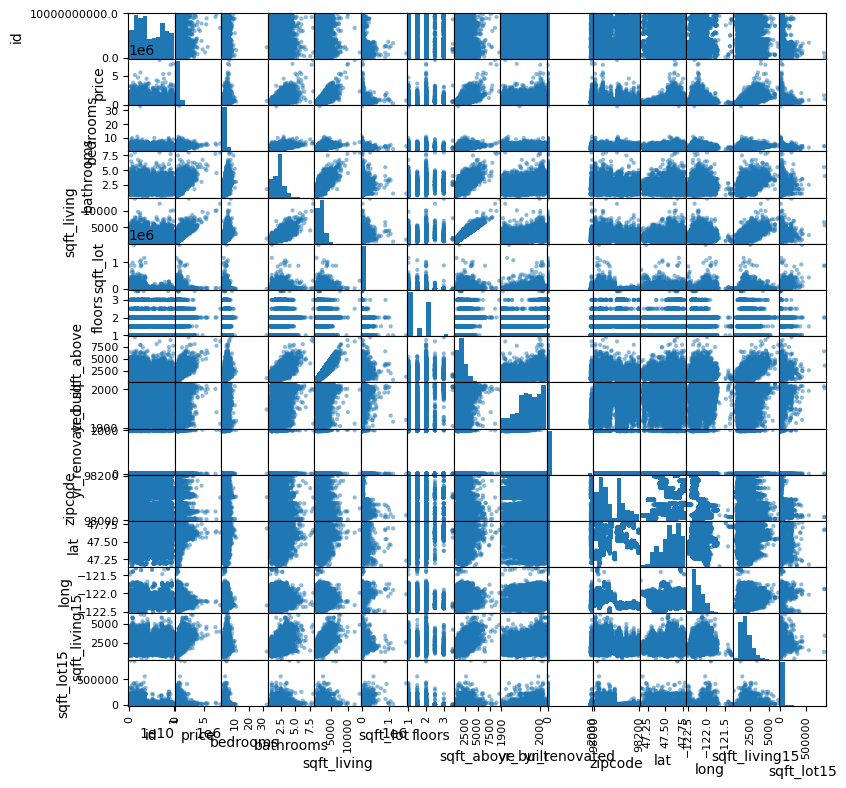

In [109]:
pd.plotting.scatter_matrix(data_df,figsize  = [9, 9]);
plt.show()

In [71]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


This does not make much sense so lets go 

* Include stack and zip to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [78]:
#correlation matrix that have correlations over .75, but less than 1.
df = data_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['price'] = list(zip(df.level_0, df.level_1))

df.set_index(['price'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
price,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758


In [ ]:
0.75-1